In [1]:
import pandas as pd
import pathlib as path
import json
import matplotlib
import ast

from pprint import pprint


In [2]:
movies_metadata_df = pd.read_csv("Resources/movies_metadata.csv")
#ratings_df = pd.read_csv("Resources/ratings.csv")
#keywords_df = pd.read_csv("Resources/keywords.csv")
#links_df = pd.read_csv("Resources/links.csv")

movies_metadata_df.head()
#ratings_df.head()
#keywords_df.head()
#links_df.head()

/var/folders/qt/x3npm1257yl6mmvpxswgk46h0000gn/T/ipykernel_806/3640553169.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_metadata_df = pd.read_csv("Resources/movies_metadata.csv")


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
# Drop columns with unneeded data.

clean_movies_metadata_df = movies_metadata_df.drop(columns=["adult", "poster_path", "production_companies", "belongs_to_collection", 
                                                            "homepage", "original_language", "original_title", "overview", "release_date", 
                                                            "runtime", "spoken_languages", "status", "tagline","video"])

clean_movies_metadata_df



,budget,genres,id,imdb_id,popularity,production_countries,revenue,title,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",373554033.0,Toy Story,7.7,5415.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",262797249.0,Jumanji,6.9,2413.0
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,11.7129,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,Grumpier Old Men,6.5,92.0
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",81452156.0,Waiting to Exhale,6.1,34.0
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...",76578911.0,Father of the Bride Part II,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...
45461,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,tt6209470,0.072051,"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",0.0,Subdue,4.0,1.0
45462,0,"[{'id': 18, 'name': 'Drama'}]",111109,tt2028550,0.178241,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",0.0,Century of Birthing,9.0,3.0
45463,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,tt0303758,0.903007,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,Betrayal,3.8,6.0
45464,0,[],227506,tt0008536,0.003503,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",0.0,Satan Triumphant,0.0,0.0


In [4]:
print(clean_movies_metadata_df.isnull().values.any())



True


In [ ]:
#clean_movies_metadata_df.dropna(axis=0, how="any", inplace=True)

#drop rows with missing values

clean_movies_metadata_df=clean_movies_metadata_df.dropna()
clean_movies_metadata_df=clean_movies_metadata_df.dropna(axis=1,)

clean_movies_metadata_df

,budget,genres,id,imdb_id,popularity,production_countries,revenue,title,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",373554033.0,Toy Story,7.7,5415.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",262797249.0,Jumanji,6.9,2413.0
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,11.7129,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,Grumpier Old Men,6.5,92.0
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",81452156.0,Waiting to Exhale,6.1,34.0
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...",76578911.0,Father of the Bride Part II,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...
45461,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,tt6209470,0.072051,"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",0.0,Subdue,4.0,1.0
45462,0,"[{'id': 18, 'name': 'Drama'}]",111109,tt2028550,0.178241,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",0.0,Century of Birthing,9.0,3.0
45463,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,tt0303758,0.903007,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,Betrayal,3.8,6.0
45464,0,[],227506,tt0008536,0.003503,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",0.0,Satan Triumphant,0.0,0.0


In [ ]:
clean_movies_metadata_df.info()

In [5]:

#Ensure to convert any string in the genres column is converted into a Python Object - List or Dictionary. 

clean_movies_metadata_df["genres"]=clean_movies_metadata_df["genres"].apply(lambda x:ast.literal_eval(x) if isinstance(x, str) else x) 

# Extract the value of the "name" key. If ots not a list, assign an empty list instead. 

clean_movies_metadata_df["genres"]=clean_movies_metadata_df["genres"].apply(lambda x: [i["name"] for i in x] if isinstance(x, list) else [])

#clean_movies_metadata_df = clean_movies_metadata_df.explode("genres")

clean_movies_metadata_df.head()

,budget,genres,id,imdb_id,popularity,production_countries,revenue,title,vote_average,vote_count
0,30000000,"[Animation, Comedy, Family]",862,tt0114709,21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",373554033.0,Toy Story,7.7,5415.0
1,65000000,"[Adventure, Fantasy, Family]",8844,tt0113497,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",262797249.0,Jumanji,6.9,2413.0
2,0,"[Romance, Comedy]",15602,tt0113228,11.7129,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,Grumpier Old Men,6.5,92.0
3,16000000,"[Comedy, Drama, Romance]",31357,tt0114885,3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",81452156.0,Waiting to Exhale,6.1,34.0
4,0,[Comedy],11862,tt0113041,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...",76578911.0,Father of the Bride Part II,5.7,173.0


In [6]:
exploded_df = clean_movies_metadata_df.explode("genres", ignore_index=True)

exploded_df

,budget,genres,id,imdb_id,popularity,production_countries,revenue,title,vote_average,vote_count
0,30000000,Animation,862,tt0114709,21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",373554033.0,Toy Story,7.7,5415.0
1,30000000,Comedy,862,tt0114709,21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",373554033.0,Toy Story,7.7,5415.0
2,30000000,Family,862,tt0114709,21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",373554033.0,Toy Story,7.7,5415.0
3,65000000,Adventure,8844,tt0113497,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",262797249.0,Jumanji,6.9,2413.0
4,65000000,Fantasy,8844,tt0113497,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",262797249.0,Jumanji,6.9,2413.0
...,...,...,...,...,...,...,...,...,...,...
93487,0,Action,67758,tt0303758,0.903007,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,Betrayal,3.8,6.0
93488,0,Drama,67758,tt0303758,0.903007,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,Betrayal,3.8,6.0
93489,0,Thriller,67758,tt0303758,0.903007,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,Betrayal,3.8,6.0
93490,0,NaN,227506,tt0008536,0.003503,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",0.0,Satan Triumphant,0.0,0.0


In [7]:
#Ensure to convert any string in the genres column is convert into a Python Object - List or Dictionary.

exploded_df["production_countries"] = exploded_df["production_countries"].apply(lambda x:ast.literal_eval(x) if isinstance(x, str) else x)

# Extract the value of the "name" key. If ots not a list, assign an empty list instead.

exploded_df["production_countries"] = exploded_df["production_countries"].apply(lambda x: [i["name"] for i in x] if isinstance(x, list) else [])

exploded_df


,budget,genres,id,imdb_id,popularity,production_countries,revenue,title,vote_average,vote_count
0,30000000,Animation,862,tt0114709,21.946943,[United States of America],373554033.0,Toy Story,7.7,5415.0
1,30000000,Comedy,862,tt0114709,21.946943,[United States of America],373554033.0,Toy Story,7.7,5415.0
2,30000000,Family,862,tt0114709,21.946943,[United States of America],373554033.0,Toy Story,7.7,5415.0
3,65000000,Adventure,8844,tt0113497,17.015539,[United States of America],262797249.0,Jumanji,6.9,2413.0
4,65000000,Fantasy,8844,tt0113497,17.015539,[United States of America],262797249.0,Jumanji,6.9,2413.0
...,...,...,...,...,...,...,...,...,...,...
93487,0,Action,67758,tt0303758,0.903007,[United States of America],0.0,Betrayal,3.8,6.0
93488,0,Drama,67758,tt0303758,0.903007,[United States of America],0.0,Betrayal,3.8,6.0
93489,0,Thriller,67758,tt0303758,0.903007,[United States of America],0.0,Betrayal,3.8,6.0
93490,0,NaN,227506,tt0008536,0.003503,[Russia],0.0,Satan Triumphant,0.0,0.0


In [8]:
exploded_final_df = exploded_df.explode("production_countries")

exploded_final_df.head(25)

,budget,genres,id,imdb_id,popularity,production_countries,revenue,title,vote_average,vote_count
0,30000000,Animation,862,tt0114709,21.946943,United States of America,373554033.0,Toy Story,7.7,5415.0
1,30000000,Comedy,862,tt0114709,21.946943,United States of America,373554033.0,Toy Story,7.7,5415.0
2,30000000,Family,862,tt0114709,21.946943,United States of America,373554033.0,Toy Story,7.7,5415.0
3,65000000,Adventure,8844,tt0113497,17.015539,United States of America,262797249.0,Jumanji,6.9,2413.0
4,65000000,Fantasy,8844,tt0113497,17.015539,United States of America,262797249.0,Jumanji,6.9,2413.0
5,65000000,Family,8844,tt0113497,17.015539,United States of America,262797249.0,Jumanji,6.9,2413.0
6,0,Romance,15602,tt0113228,11.7129,United States of America,0.0,Grumpier Old Men,6.5,92.0
7,0,Comedy,15602,tt0113228,11.7129,United States of America,0.0,Grumpier Old Men,6.5,92.0
8,16000000,Comedy,31357,tt0114885,3.859495,United States of America,81452156.0,Waiting to Exhale,6.1,34.0
9,16000000,Drama,31357,tt0114885,3.859495,United States of America,81452156.0,Waiting to Exhale,6.1,34.0


In [16]:
cleaned_metadata_df = exploded_final_df.rename(columns={"budget":"Budget", "genres":"Genres", "id":"ID", "imdb_id":"IMDB ID", "popularity":"Popularity", "production_countries": "Production Country", "revenue": "Revenue", "title": "Movie Title", "vote_average": "Average Rating", "vote_count": "Vote County"})

cleaned_metadata_df

,Budget,Genres,ID,IMDB ID,Popularity,Production Country,Revenue,Movie Title,Average Rating,Vote County
0,30000000,Animation,862,tt0114709,21.946943,United States of America,373554033.0,Toy Story,7.7,5415.0
1,30000000,Comedy,862,tt0114709,21.946943,United States of America,373554033.0,Toy Story,7.7,5415.0
2,30000000,Family,862,tt0114709,21.946943,United States of America,373554033.0,Toy Story,7.7,5415.0
3,65000000,Adventure,8844,tt0113497,17.015539,United States of America,262797249.0,Jumanji,6.9,2413.0
4,65000000,Fantasy,8844,tt0113497,17.015539,United States of America,262797249.0,Jumanji,6.9,2413.0
...,...,...,...,...,...,...,...,...,...,...
93487,0,Action,67758,tt0303758,0.903007,United States of America,0.0,Betrayal,3.8,6.0
93488,0,Drama,67758,tt0303758,0.903007,United States of America,0.0,Betrayal,3.8,6.0
93489,0,Thriller,67758,tt0303758,0.903007,United States of America,0.0,Betrayal,3.8,6.0
93490,0,NaN,227506,tt0008536,0.003503,Russia,0.0,Satan Triumphant,0.0,0.0


In [17]:
# Question 6 - Which countries produce the highest number of movies in specific genres (e.g., Action, Drama)?

country_genre_movie_count_df = cleaned_metadata_df.groupby(["Production Country", "Genres"]).size().reset_index(name= "Movie Count")

country_genre_movie_count_df = country_genre_movie_count_df.sort_values(by= "Movie Count", ascending=False)

country_genre_movie_count_df


,Production Country,Genres,Movie Count
1549,United States of America,Drama,9042
1546,United States of America,Comedy,6836
1560,United States of America,Thriller,4368
1543,United States of America,Action,3699
1557,United States of America,Romance,3576
...,...,...,...
907,Malta,Fantasy,1
908,Malta,History,1
909,Malta,Horror,1
910,Malta,Mystery,1


In [34]:
country_genre_movie_count_df["Production Country"].nunique()

157

In [18]:
#Country with the most action movies 

most_action_movies_df = country_genre_movie_count_df[country_genre_movie_count_df["Genres"] == "Action"]

most_action_movies_df.head(10)



,Production Country,Genres,Movie Count
1543,United States of America,Action,3699
1521,United Kingdom,Action,563
745,Japan,Action,511
578,Hong Kong,Action,421
486,France,Action,309
229,Canada,Action,289
718,Italy,Action,272
524,Germany,Action,249
630,India,Action,219
272,China,Action,152


In [19]:
#Country with the most comedy movies

most_comedy_movies_df = country_genre_movie_count_df[country_genre_movie_count_df["Genres"] == "Comedy"]

most_comedy_movies_df.head(10)

,Production Country,Genres,Movie Count
1546,United States of America,Comedy,6836
489,France,Comedy,1186
1524,United Kingdom,Comedy,1011
721,Italy,Comedy,657
527,Germany,Comedy,562
232,Canada,Comedy,383
1197,Russia,Comedy,300
748,Japan,Comedy,264
633,India,Comedy,249
1354,Spain,Comedy,246


In [20]:
#Country with the most drama movies

most_drama_movies_df = country_genre_movie_count_df[country_genre_movie_count_df["Genres"] == "Drama"]

most_drama_movies_df.head(10)

,Production Country,Genres,Movie Count
1549,United States of America,Drama,9042
492,France,Drama,2409
1527,United Kingdom,Drama,2142
530,Germany,Drama,1305
724,Italy,Drama,991
751,Japan,Drama,817
235,Canada,Drama,773
636,India,Drama,493
1357,Spain,Drama,469
1200,Russia,Drama,454


In [21]:
#Country with the most romantic movies

most_romance_movies_df = country_genre_movie_count_df[country_genre_movie_count_df["Genres"]== "Romance"]

most_romance_movies_df.head(10)

,Production Country,Genres,Movie Count
1557,United States of America,Romance,3576
500,France,Romance,713
1535,United Kingdom,Romance,656
538,Germany,Romance,288
644,India,Romance,264
732,Italy,Romance,263
243,Canada,Romance,202
759,Japan,Romance,175
1208,Russia,Romance,162
1365,Spain,Romance,133


In [22]:
#Country with the most animation movies

most_animation_movies_df = country_genre_movie_count_df[country_genre_movie_count_df["Genres"] == "Animation"]

most_animation_movies_df.head(10)

,Production Country,Genres,Movie Count
1545,United States of America,Animation,896
747,Japan,Animation,408
488,France,Animation,120
1523,United Kingdom,Animation,96
231,Canada,Animation,80
1196,Russia,Animation,80
526,Germany,Animation,72
123,Belgium,Animation,35
362,Czech Republic,Animation,25
1353,Spain,Animation,24


In [24]:
#Create a new CSV file from the cleaned data to answer questions 7 and 8.as_integer_ratio

cleaned_metadata_df.to_csv("Resources/cleaned_movie_data.csv", index=True)

In [25]:

#Create a visualization to illustrate your findings

import matplotlib.pyplot as plt



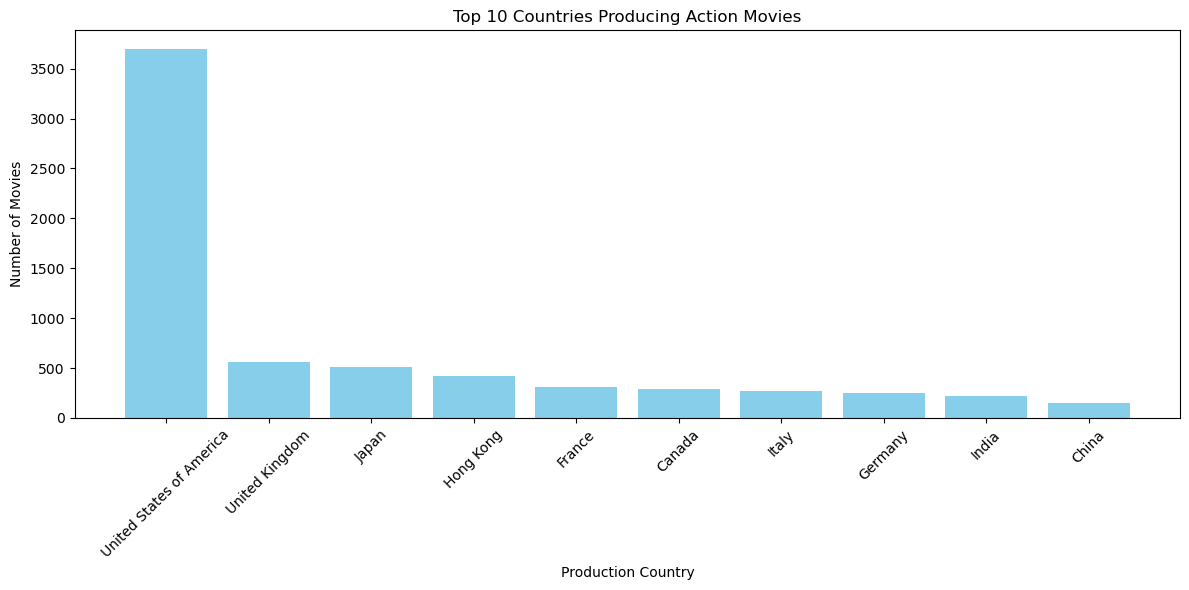

In [26]:
# Bar Chart for Action movies.
specific_genre = "Action"
action_bar_df = most_action_movies_df[most_action_movies_df["Genres"] == specific_genre].nlargest(10, "Movie Count")

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(action_bar_df["Production Country"], action_bar_df["Movie Count"], color='skyblue')
plt.xlabel("Production Country")
plt.ylabel("Number of Movies")
plt.title(f"Top 10 Countries Producing {specific_genre} Movies")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

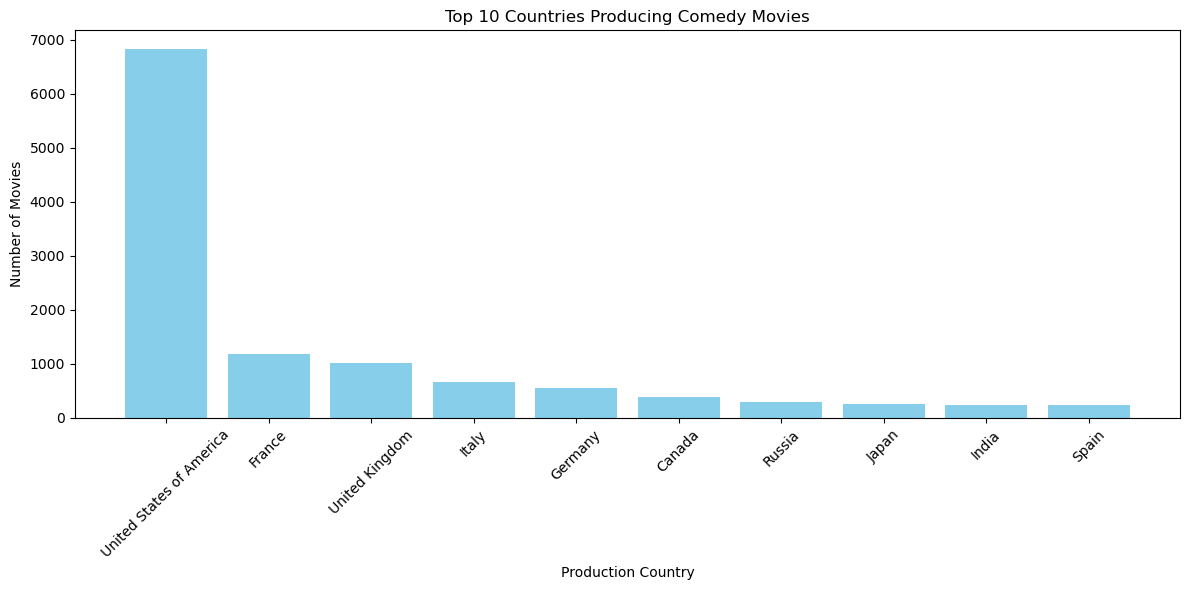

In [27]:
# Bar Chart for Comedy movies.  
specific_genre = "Comedy"
comedy_bar_df = most_comedy_movies_df[most_comedy_movies_df["Genres"] == specific_genre].nlargest(10, "Movie Count")

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(comedy_bar_df["Production Country"], comedy_bar_df["Movie Count"], color='skyblue')
plt.xlabel("Production Country")
plt.ylabel("Number of Movies")
plt.title(f"Top 10 Countries Producing {specific_genre} Movies")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

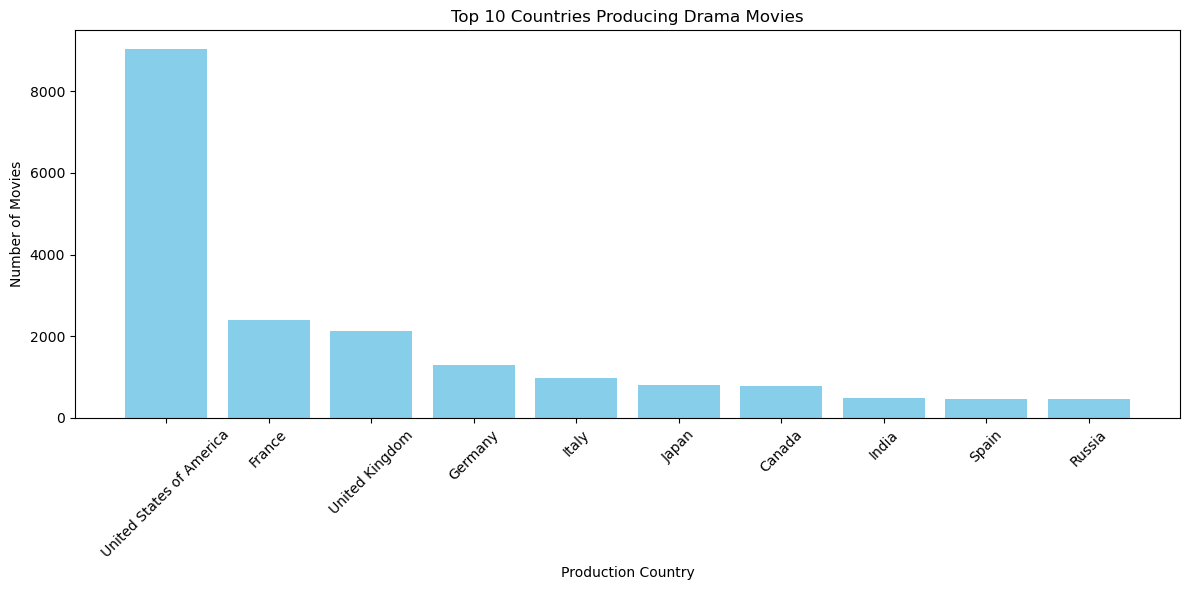

In [28]:
# Bar Chart for Drama movies.  
specific_genre = "Drama"
drama_bar_df = most_drama_movies_df[most_drama_movies_df["Genres"] == specific_genre].nlargest(10, "Movie Count")

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(drama_bar_df["Production Country"], drama_bar_df["Movie Count"], color='skyblue')
plt.xlabel("Production Country")
plt.ylabel("Number of Movies")
plt.title(f"Top 10 Countries Producing {specific_genre} Movies")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

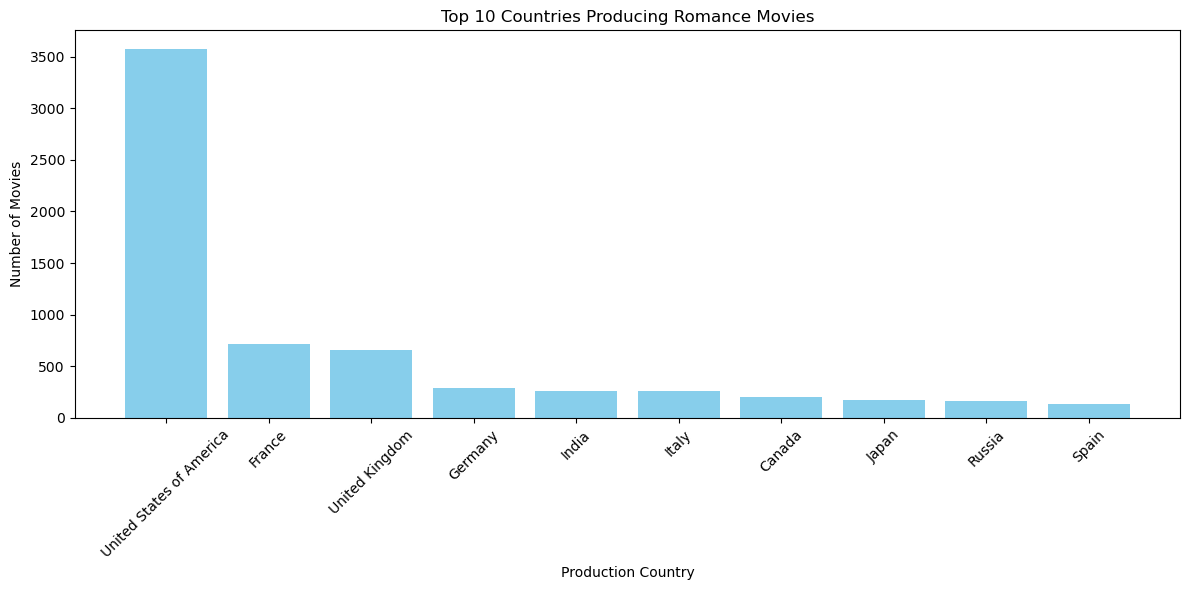

In [29]:
# Bar Chart for Romantic movies.  
specific_genre = "Romance"
romance_bar_df = most_romance_movies_df[most_romance_movies_df["Genres"] == specific_genre].nlargest(10, "Movie Count")

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(romance_bar_df["Production Country"], romance_bar_df["Movie Count"], color='skyblue')
plt.xlabel("Production Country")
plt.ylabel("Number of Movies")
plt.title(f"Top 10 Countries Producing {specific_genre} Movies")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

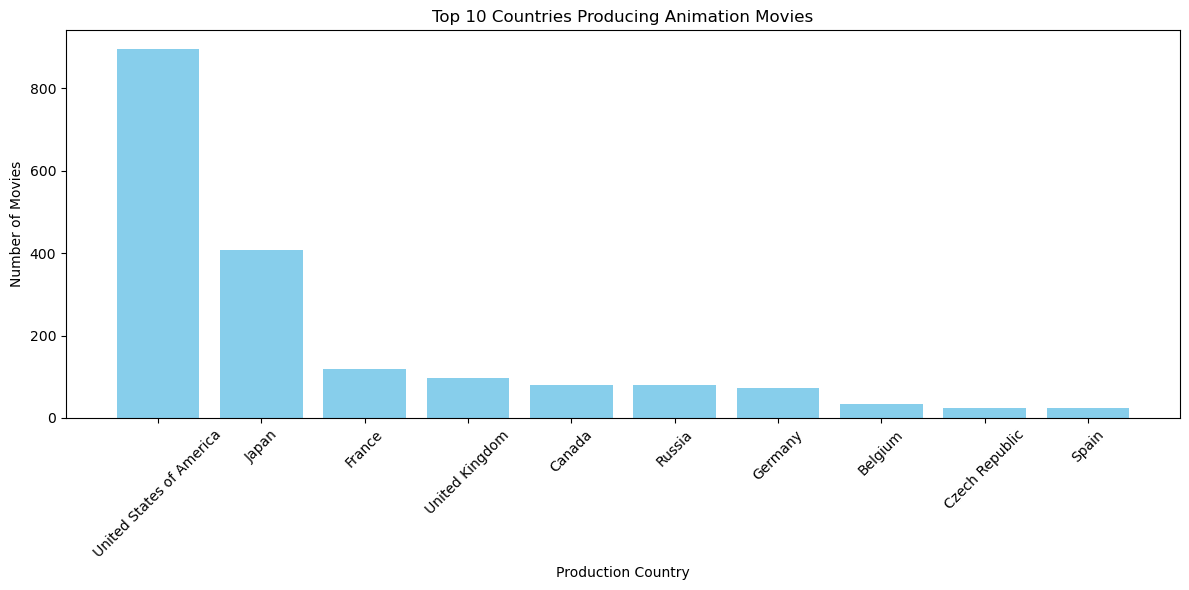

In [30]:
# Bar Chart for Animation movies.  
specific_genre = "Animation"
animation_bar_df = most_animation_movies_df[most_animation_movies_df["Genres"] == specific_genre].nlargest(10, "Movie Count")

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(animation_bar_df["Production Country"], animation_bar_df["Movie Count"], color='skyblue')
plt.xlabel("Production Country")
plt.ylabel("Number of Movies")
plt.title(f"Top 10 Countries Producing {specific_genre} Movies")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()